In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import xgboost as xgb
#Load dataset
data=pd.read_csv('marketing_campaign.xls',sep='\t')


In [99]:
data=data.dropna()

In [100]:
#Code to display full rows and coluuns of the dataset
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [101]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [102]:
print(data['Dt_Customer'].dtype)

object


In [103]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')

In [104]:
print(data['Dt_Customer'].dtype)

datetime64[ns]


In [105]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [106]:
#Now converting the categorical values(Education and marital status) into numberical
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [107]:
#Mapping for education columun for conversion of categorical data to numerical data
education_mapping={
    'Basic': 1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5}
data['Education']=data['Education'].map(education_mapping)

In [108]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,3,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,3,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,3,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [109]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [110]:
marital_status_mapping={
    'Single': 1,
    'Married': 2,
    'Together': 3,
    'Divorced': 4,
    'Widow' : 5,
    'Alone': 6,
    'Absurd':7,
    'YOLO': 8
}

In [111]:
data['Marital_Status']=data['Marital_Status'].map(marital_status_mapping)

In [112]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [113]:
##Step 3 : Adding some features:
#feature 1 :from when the customer is us 
data['Customer_for']=2024-data['Dt_Customer'].dt.year
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11


In [114]:
data['Age']=2024-data['Year_Birth']
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for,Age
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,67
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,70
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,59


In [115]:
#Feature:
data['TotalChildren']=data['Kidhome']+data['Teenhome']
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for,Age,TotalChildren
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,67,0
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,70,2
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,59,0


In [116]:

#Adding feature2: TotalMntSpent
data['TotalMntSpent']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [117]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for,Age,TotalChildren,TotalMntSpent
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,67,0,1617
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,70,2,27
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,59,0,776


In [118]:
#Adding feature3: TotalPurchases
data['TotalPurchases']=data['NumDealsPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

In [119]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for,Age,TotalChildren,TotalMntSpent,TotalPurchases
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,67,0,1617,25
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,70,2,27,6
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,59,0,776,21


In [120]:
data['AvergaeSpendPerPurchase']=data['TotalMntSpent']/data['TotalPurchases']
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for,Age,TotalChildren,TotalMntSpent,TotalPurchases,AvergaeSpendPerPurchase
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,67,0,1617,25,64.680000
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,70,2,27,6,4.500000
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,59,0,776,21,36.952381


In [121]:
data['AverageSpendPerVisit']=data['TotalMntSpent']/data['NumWebVisitsMonth']
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for,Age,TotalChildren,TotalMntSpent,TotalPurchases,AvergaeSpendPerPurchase,AverageSpendPerVisit
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,67,0,1617,25,64.680000,231.0
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,70,2,27,6,4.500000,5.4
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,59,0,776,21,36.952381,194.0


In [122]:
data['DaysAsCustomer']=(pd.to_datetime('2024-01-01')-data['Dt_Customer']).dt.days
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for,Age,TotalChildren,TotalMntSpent,TotalPurchases,AvergaeSpendPerPurchase,AverageSpendPerVisit,DaysAsCustomer
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,67,0,1617,25,64.680000,231.0,4136
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,70,2,27,6,4.500000,5.4,3586
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,59,0,776,21,36.952381,194.0,3785


In [123]:
#Replacing infinity value with zero
data.replace([np.inf,-np.inf],0,inplace=True)
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for,Age,TotalChildren,TotalMntSpent,TotalPurchases,AvergaeSpendPerPurchase,AverageSpendPerVisit,DaysAsCustomer
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,67,0,1617,25,64.680000,231.0,4136
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,70,2,27,6,4.500000,5.4,3586
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,59,0,776,21,36.952381,194.0,3785


In [124]:
##Step:4 Arranging the columns:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_for', 'Age', 'TotalChildren', 'TotalMntSpent',
       'TotalPurchases', 'AvergaeSpendPerPurchase', 'AverageSpendPerVisit',
       'DaysAsCustomer'],
      dtype='object')

In [125]:
new_column=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency','Complain', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases','AcceptedCmp1',
       'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response',  'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
         'Z_CostContact', 'Z_Revenue', 
       'Customer_for','Age','TotalChildren', 'TotalMntSpent', 'TotalPurchases','AvergaeSpendPerPurchase', 'AverageSpendPerVisit', 'DaysAsCustomer']

In [126]:
data=data[new_column]

In [127]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Customer_for,Age,TotalChildren,TotalMntSpent,TotalPurchases,AvergaeSpendPerPurchase,AverageSpendPerVisit,DaysAsCustomer
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11,12,67,0,1617,25,64.680000,231.0,4136
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11,10,70,2,27,6,4.500000,5.4,3586
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11,11,59,0,776,21,36.952381,194.0,3785


In [128]:
delete_columns=['Z_CostContact','Z_Revenue']
data=data.drop(columns=delete_columns)

In [129]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,TotalChildren,TotalMntSpent,TotalPurchases,AvergaeSpendPerPurchase,AverageSpendPerVisit,DaysAsCustomer
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,12,67,0,1617,25,64.680000,231.000000,4136
1,2174,1954,3,1,46344.0,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,10,70,2,27,6,4.500000,5.400000,3586
2,4141,1965,3,3,71613.0,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,11,59,0,776,21,36.952381,194.000000,3785
3,6182,1984,3,3,26646.0,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,10,40,1,53,8,6.625000,8.833333,3612
4,5324,1981,5,2,58293.0,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,10,43,1,422,19,22.210526,84.400000,3634
5,7446,1967,4,3,62513.0,0,1,2013-09-09,16,0,520,42,98,0,42,14,2,0,0,0,0,0,0,6,4,10,6,11,57,1,716,22,32.545455,119.333333,3766
6,965,1971,3,4,55635.0,0,1,2012-11-13,34,0,235,65,164,50,49,27,4,0,0,0,0,0,0,7,3,7,6,12,53,1,590,21,28.095238,98.333333,4066
7,6177,1985,5,2,33454.0,1,0,2013-05-08,32,0,76,10,56,3,1,23,2,0,0,0,0,0,0,4,0,4,8,11,39,1,169,10,16.900000,21.125000,3890
8,4855,1974,5,3,30351.0,1,0,2013-06-06,19,0,14,0,24,3,3,2,1,0,0,0,0,0,1,3,0,2,9,11,50,1,46,6,7.666667,5.111111,3861
9,5899,1950,5,3,5648.0,1,1,2014-03-13,68,0,28,0,6,1,1,13,1,0,0,1,0,0,0,1,0,0,20,10,74,2,49,2,24.500000,2.450000,3581


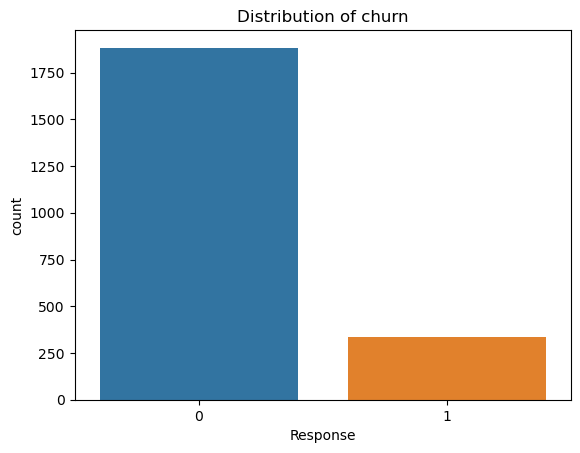

In [130]:
##Step 5: Data Analysis: Exploratory Data Analysis
#Ploting the distribution of churn
sns.countplot(x='Response',data=data)
plt.title('Distribution of churn')
plt.show()

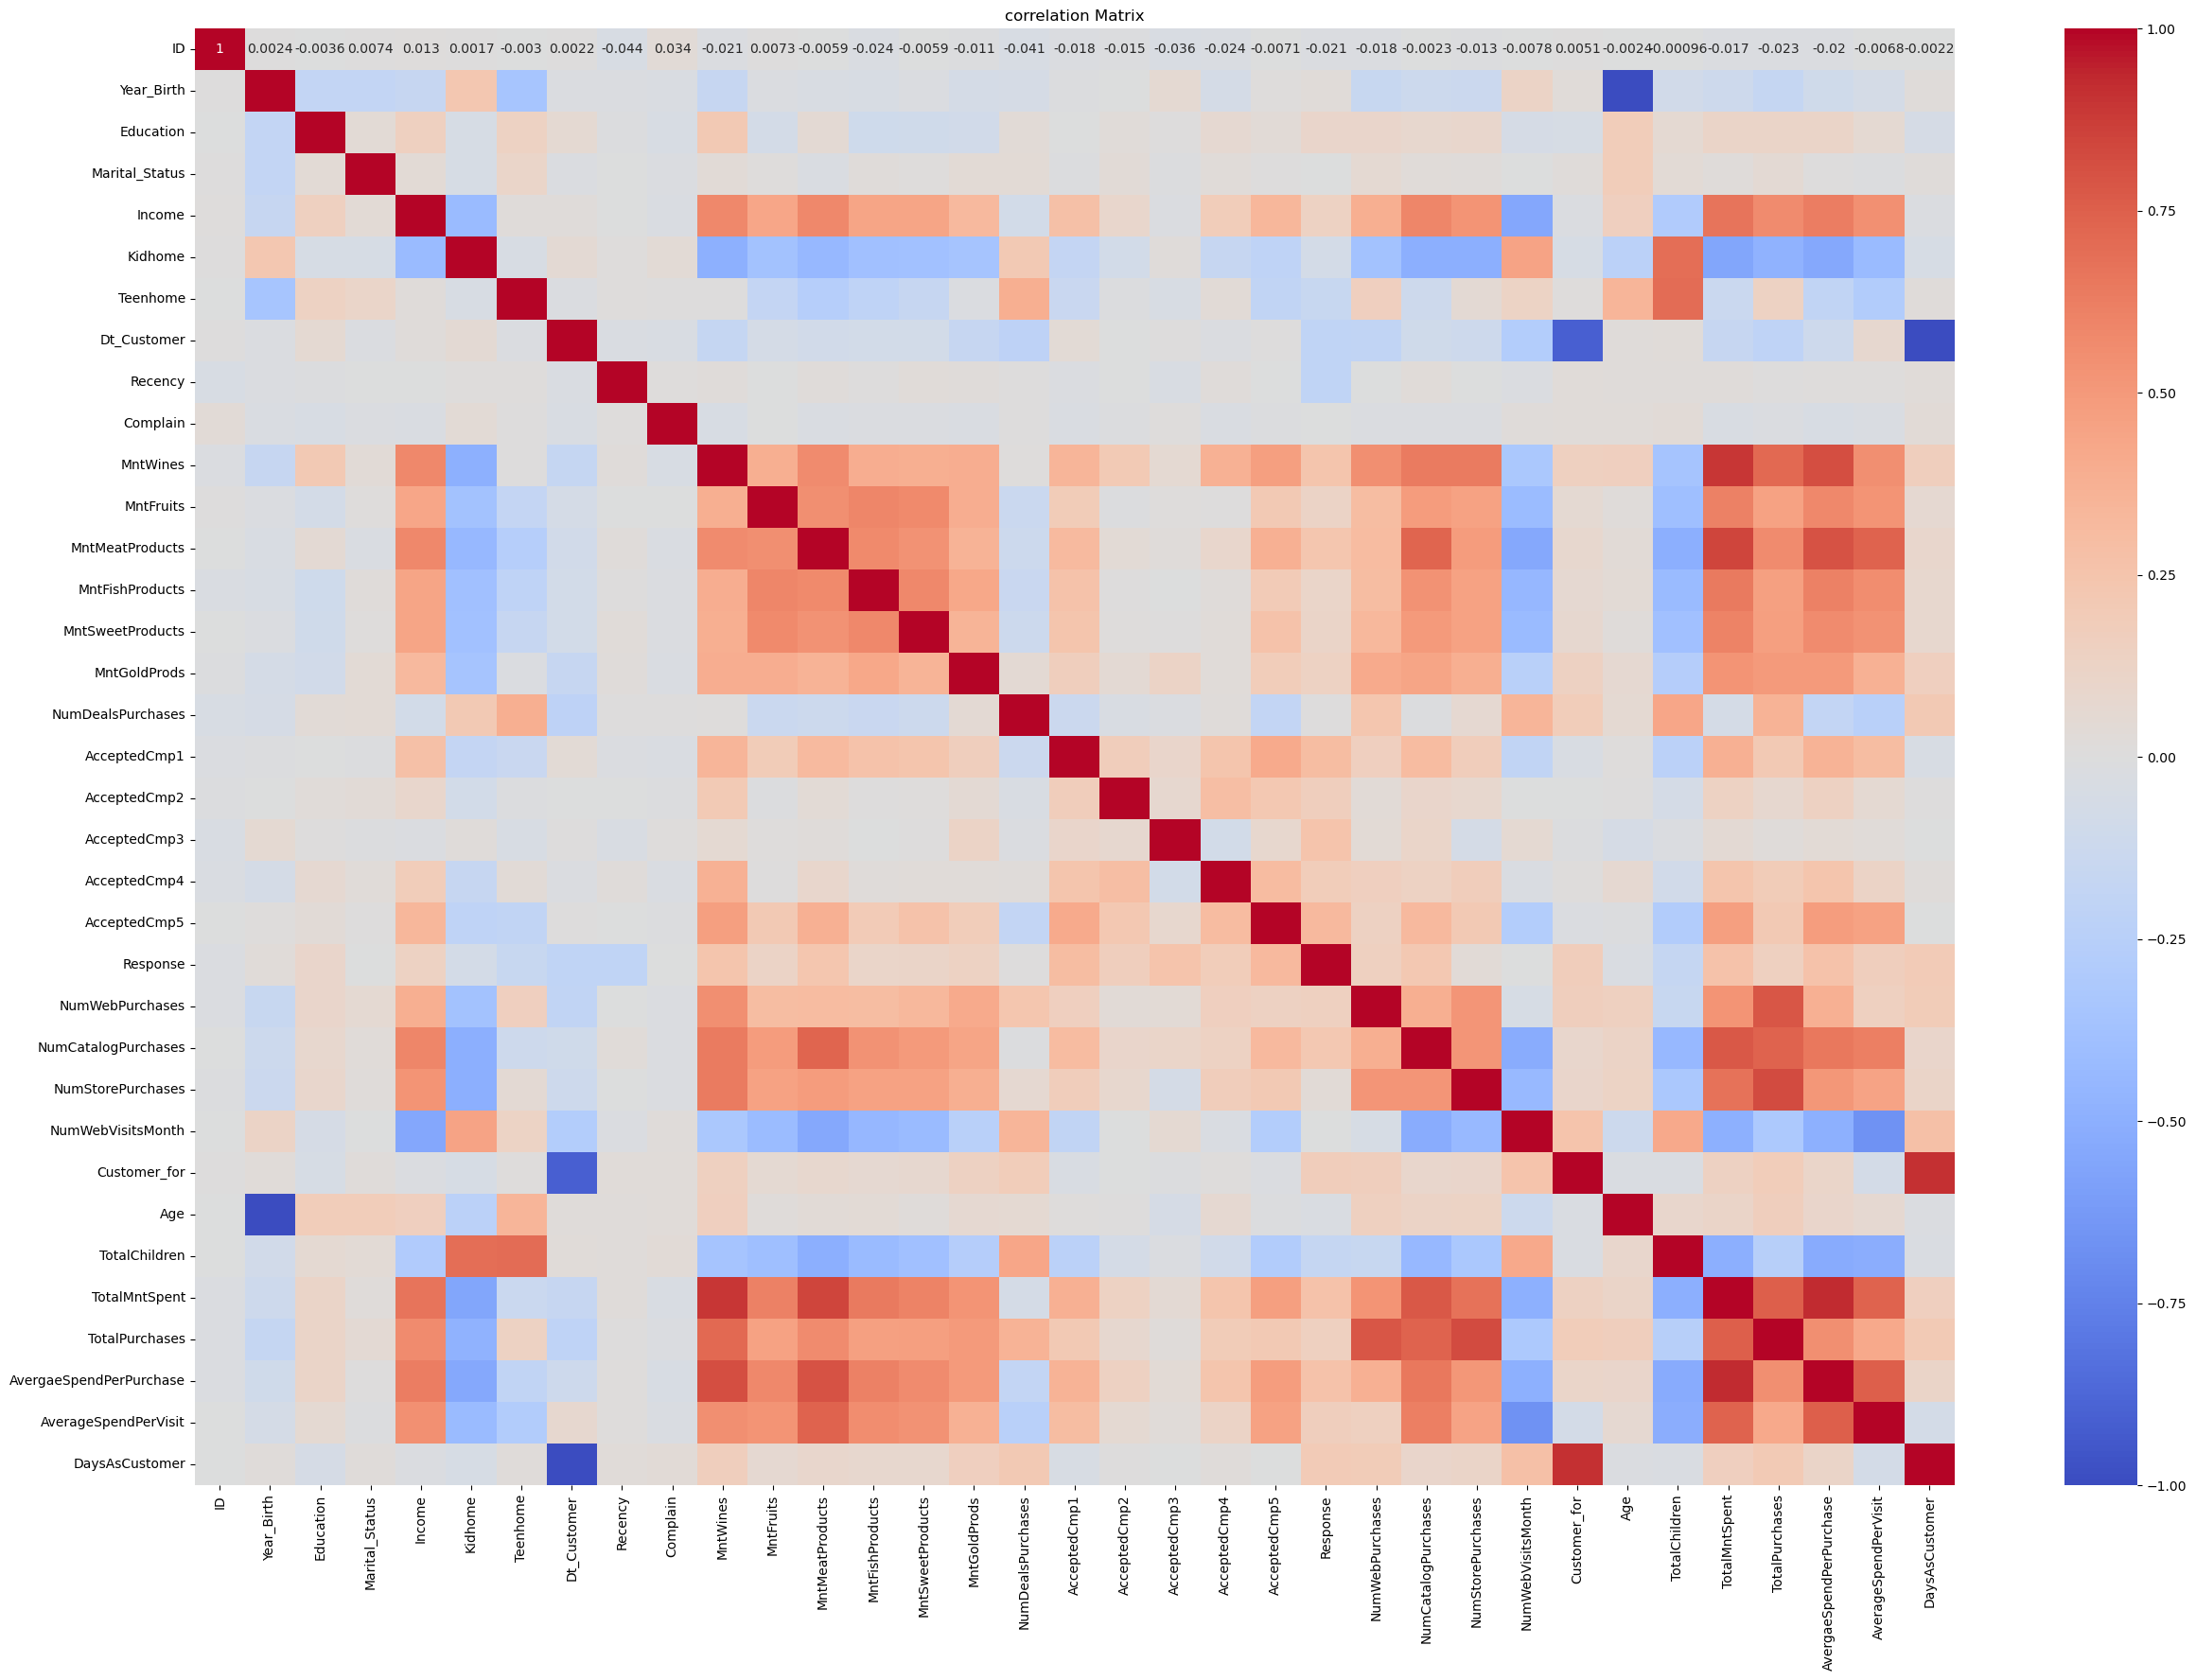

In [131]:
#Correlation plot:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

In [132]:
##Step 6: Model building
#Preparation of model building:
x=data.drop(['ID','Response','Dt_Customer'],axis=1)
y=data['Response']

In [133]:
#Dividing the data into test and the training sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [134]:
#Train the model 
model=xgb.XGBClassifier(random_state=42,use_label_encoder=False,eval_metric='logloss')
model.fit(X_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:46:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [135]:
#Now data analytics , predictive analytics for the test set
y_pred=model.predict(X_test)

In [136]:
##Step7: Evaluation of the model
print('Accuracy:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8736842105263158
[[539  30]
 [ 54  42]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       569
           1       0.58      0.44      0.50        96

    accuracy                           0.87       665
   macro avg       0.75      0.69      0.71       665
weighted avg       0.86      0.87      0.87       665



In [137]:
##Step8: prediction on the entire dataset
data['PredictedChurn']=model.predict(x)


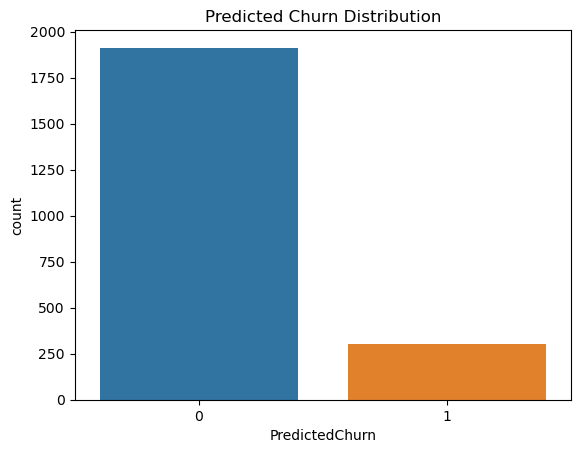

In [138]:
#Visualise the data of the churn prediction of the whole dataset
sns.countplot(x='PredictedChurn',data=data)
plt.title('Predicted Churn Distribution')
plt.show()

In [139]:
##Step:9 AUC ROC
#Calculate AUC-ROC
roc_auc=roc_auc_score(y_test,model.predict_proba(X_test)[:,0])
print('AUC-ROC:',roc_auc)

AUC-ROC: 0.09949838898652608


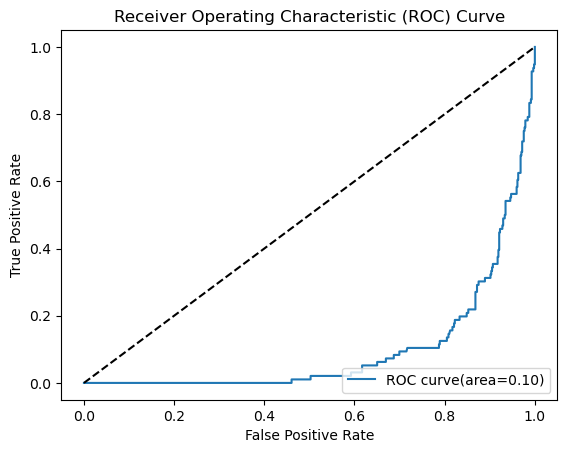

In [140]:
#Plot ROC curve
fpr,tpr,_=roc_curve(y_test,model.predict_proba(X_test)[:,0])
plt.plot(fpr,tpr,label=f'ROC curve(area={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [141]:
# Step 17: Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

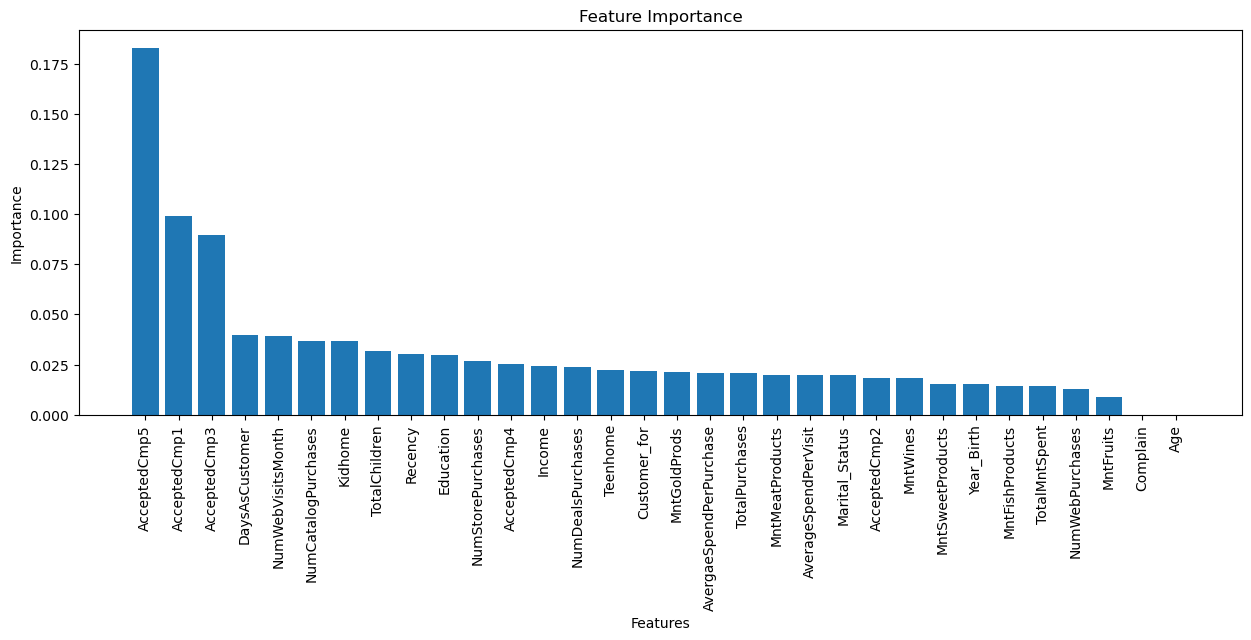

In [142]:
# Plot feature importance
plt.figure(figsize=(15, 5))
plt.title('Feature Importance')
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), features[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [143]:
data.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,TotalChildren,TotalMntSpent,TotalPurchases,AvergaeSpendPerPurchase,AverageSpendPerVisit,DaysAsCustomer,PredictedChurn
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,12,67,0,1617,25,64.68,231.0,4136,1


In [144]:
##Step8: prediction on the entire dataset
data['churn_Probability']=model.predict_proba(x)[:,0]
data.head(1)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,TotalChildren,TotalMntSpent,TotalPurchases,AvergaeSpendPerPurchase,AverageSpendPerVisit,DaysAsCustomer,PredictedChurn,churn_Probability
0,5524,1957,3,1,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,12,67,0,1617,25,64.68,231.0,4136,1,0.025719


In [145]:
#Filter the data for IDs with a churn probability greater than 0.8
high_churn_prob = data[data['churn_Probability'] > 0.75][['ID', 'churn_Probability']]
print(high_churn_prob.reset_index(drop=True))

         ID  churn_Probability
0      2174           0.995761
1      4141           0.999551
2      6182           0.999897
3      5324           0.997190
4      7446           0.996712
5       965           0.994985
6      6177           0.988492
7      5899           0.998596
8       387           0.997800
9      2125           0.997613
10     8180           0.999793
11     2569           0.995754
12     9736           0.998558
13     4939           0.997000
14     6565           0.986270
15     2278           0.996635
16     9360           0.980225
17     5376           0.894342
18     1993           0.985712
19     4047           0.998218
20     1409           0.999792
21     7892           0.995846
22     2404           0.952799
23     9422           0.998964
24     1966           0.995358
25     6864           0.999940
26     3033           0.999311
27     5710           0.999289
28    10738           0.999696
29     4339           0.999847
30    10755           0.998461
31     8